In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor
from subfunc import plot_feature_importance, show_result
from subfunc import multi_model_load, multi_model_save
from tqdm import tqdm

In [2]:
DATA_PATH = 'data/'

data_train = pd.read_csv(f'{DATA_PATH}train.csv',sep='\t', index_col='index')
data_test = pd.read_csv(f'{DATA_PATH}test.csv', sep='\t', index_col='index')

Наша обучающая выборка

In [3]:
data_train

,DT,t вып-обр,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,...,ПРОФИЛЬ_ОР65,ПРОФИЛЬ_Р50,ПРОФИЛЬ_Р65,ПРОФИЛЬ_Рельсы трамвайные,ПРОФИЛЬ_Шар заг d шара 100 мм 2 гр.,"ПРОФИЛЬ_Шар заг d шара 80-100 мм 2,3 гр.",ПРОФИЛЬ_Шар заг d шара 80-100 мм 4 гр.,ПРОФИЛЬ_Шары мелющие d 80-100 мм,ПРОФИЛЬ_Швеллер 40У,ПРОФИЛЬ_Швеллер 40У (12 категория)
index,,,,,,,,,,,,,,,,,,,,,
2,0.032218,0.252525,0.158119,0.347280,0.361659,0.119961,0.353047,0.277280,0.361008,0.806763,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.038414,0.181818,0.169606,0.347280,0.412803,0.196612,0.591860,0.331270,0.364997,0.797101,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,0.037175,0.646465,0.169674,0.273132,0.462289,0.164952,0.474718,0.341238,0.352495,0.789855,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,0.033457,0.303030,0.155551,0.284751,0.474196,0.167451,0.506961,0.263029,0.355220,0.811594,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,0.043371,0.212121,0.152848,0.296862,0.502470,0.183282,0.584001,0.388706,0.349613,0.828502,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,0.027261,0.393939,0.151970,0.426330,0.585208,0.158236,0.332855,0.247566,0.830657,0.717391,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7036,0.023544,0.424242,0.153321,0.417492,0.588662,0.155763,0.343133,0.195616,0.833283,0.707729,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7037,0.034696,0.373737,0.170417,0.364244,0.609432,0.181316,0.417853,0.309796,0.831691,0.765700,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Наша целевая выборка

In [4]:
data_test

,DT,t вып-обр,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,...,ПРОФИЛЬ_ОР65,ПРОФИЛЬ_Р50,ПРОФИЛЬ_Р65,ПРОФИЛЬ_Рельсы трамвайные,ПРОФИЛЬ_Шар заг d шара 100 мм 2 гр.,"ПРОФИЛЬ_Шар заг d шара 80-100 мм 2,3 гр.",ПРОФИЛЬ_Шар заг d шара 80-100 мм 4 гр.,ПРОФИЛЬ_Шары мелющие d 80-100 мм,ПРОФИЛЬ_Швеллер 40У,ПРОФИЛЬ_Швеллер 40У (12 категория)
index,,,,,,,,,,,,,,,,,,,,,
4,0.030979,0.212121,0.178999,0.347280,0.425986,0.154954,0.452365,0.284025,0.354884,0.816425,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,0.059480,0.212121,0.172985,0.369599,0.593939,0.211609,0.627351,0.424401,0.368192,0.828502,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,0.037175,0.080808,0.238665,0.356371,0.397613,0.184115,0.563643,0.296157,0.360206,0.722222,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,0.039653,0.161616,0.149537,0.484767,0.589093,0.061026,0.187400,0.180920,0.823513,0.719807,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,0.033457,0.252525,0.159538,0.494584,0.513311,0.133769,0.279409,0.389659,0.366890,0.722222,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,0.027261,0.121212,0.161633,0.450169,0.306362,0.204302,0.343550,0.176754,0.336100,0.690821,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3466,0.026022,0.141414,0.150145,0.588155,0.262228,0.222328,0.382810,0.173629,0.334764,0.664251,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3470,0.057001,0.080808,0.151362,0.398364,0.418172,0.254946,0.545289,0.331931,0.326757,0.768116,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
target_list = ['химшлак последний Al2O3', 'химшлак последний CaO', 'химшлак последний R', 'химшлак последний SiO2']

Деление выборок на обучающие признаки и целевые

In [6]:
data_train_marked = data_train.drop(columns=target_list)
target_train = data_train[target_list]

data_test_non_marked = data_train.drop(columns=target_list)
target_test = data_train[target_list]

In [7]:
is_fitted = False

In [8]:
best_model = None
np.random.seed(42)
best_score = 0

if not is_fitted:
    for n_estimators in tqdm(range(300, 600, 50)):
        for lr in tqdm(range(1, 200, 10)):
            mult_model  = MultiOutputRegressor(GradientBoostingRegressor(
                n_estimators=n_estimators,
                learning_rate=lr/1000))

            mult_model.fit(data_train_marked, target_train)
            cur_score = r2_score(target_test, mult_model.predict(data_test_non_marked))

            if cur_score > best_score:
                best_score = cur_score
                best_model = mult_model

    multi_model_save(best_model)

else:
    best_model = multi_model_load()
    best_score = r2_score(target_test, best_model.predict(data_test_non_marked))

100%|██████████| 6/6 [1:12:27<00:00, 724.54s/it]


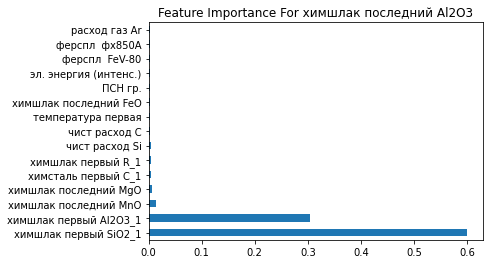

In [9]:
plot_feature_importance(best_model, data_train_marked, 0, 'Feature Importance For химшлак последний Al2O3')

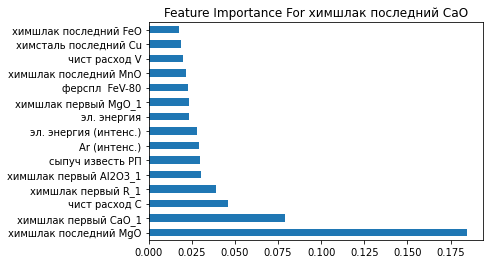

In [10]:
plot_feature_importance(best_model, data_train_marked, 1, 'Feature Importance For химшлак последний CaO')

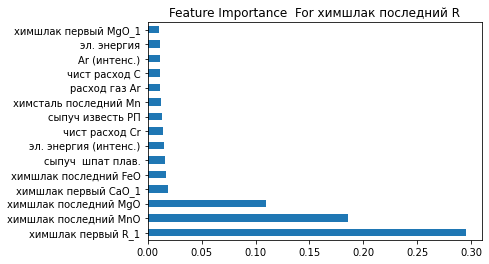

In [11]:
plot_feature_importance(best_model, data_train_marked, 2, 'Feature Importance  For химшлак последний R')

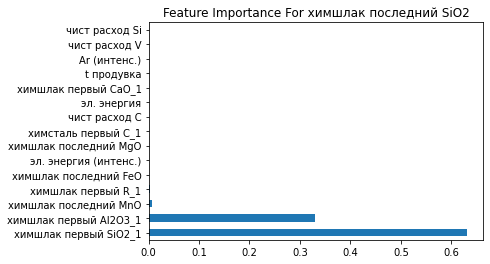

In [12]:
plot_feature_importance(best_model, data_train_marked, 3, 'Feature Importance For химшлак последний SiO2')

In [13]:
best_score

0.9522972989328378

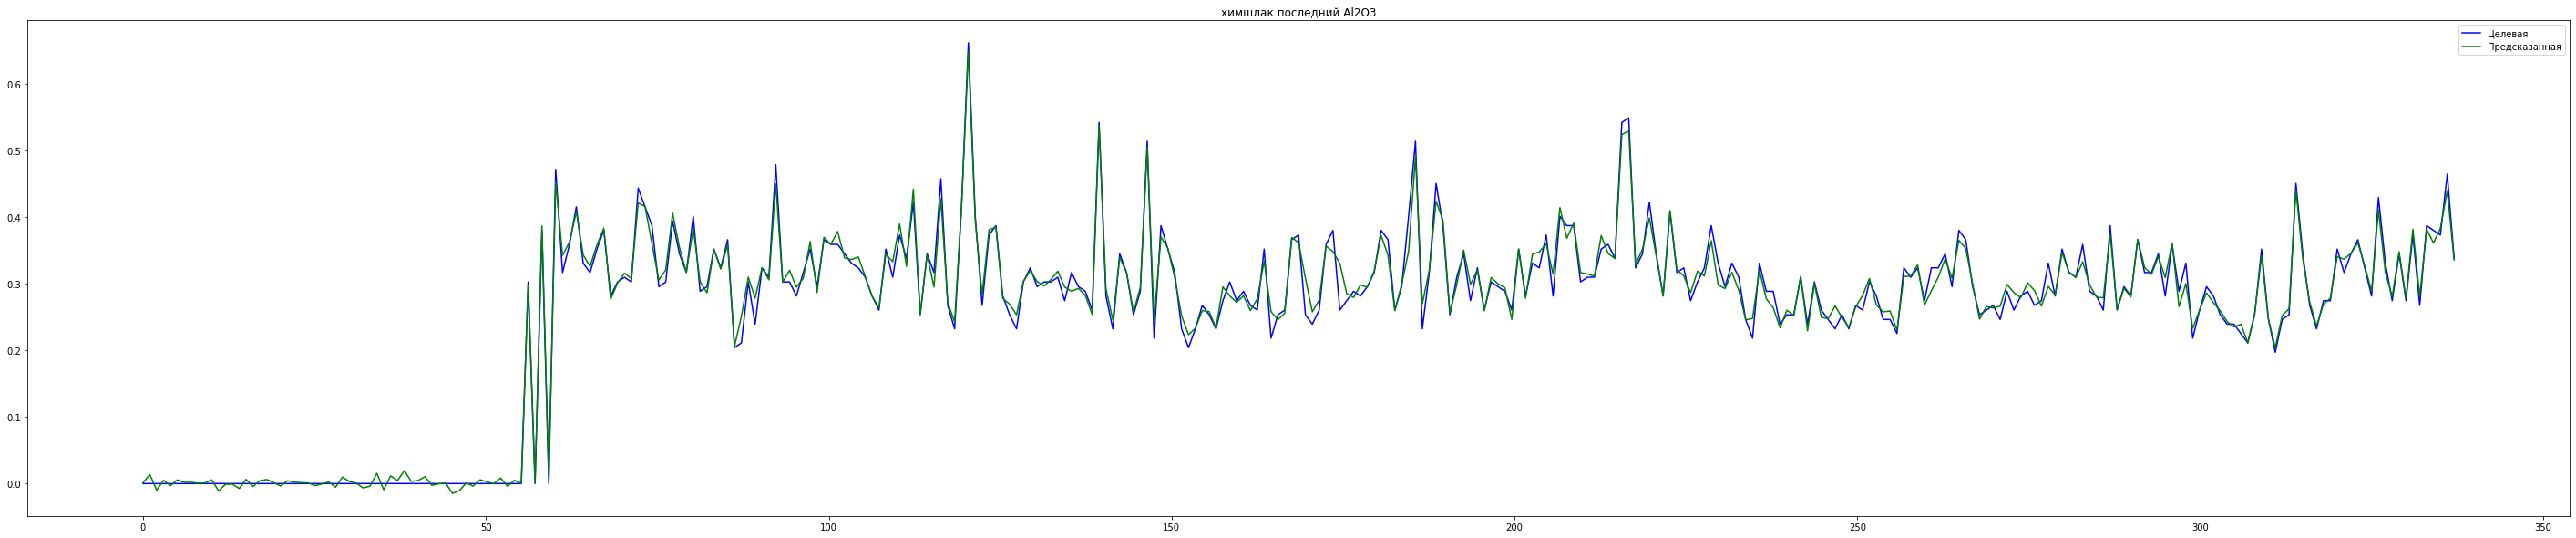

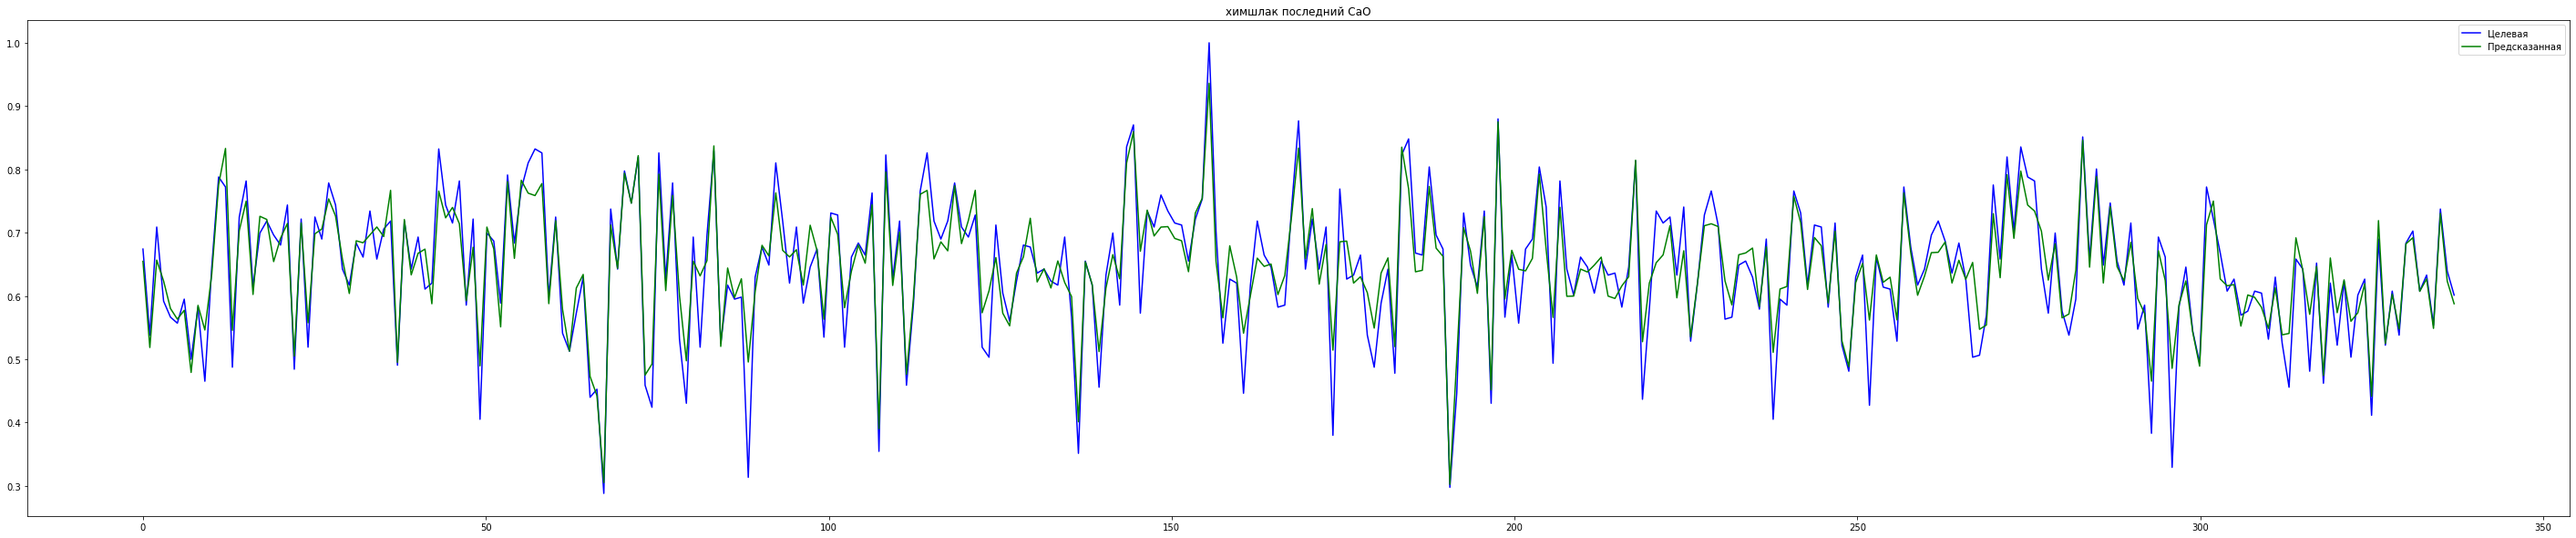

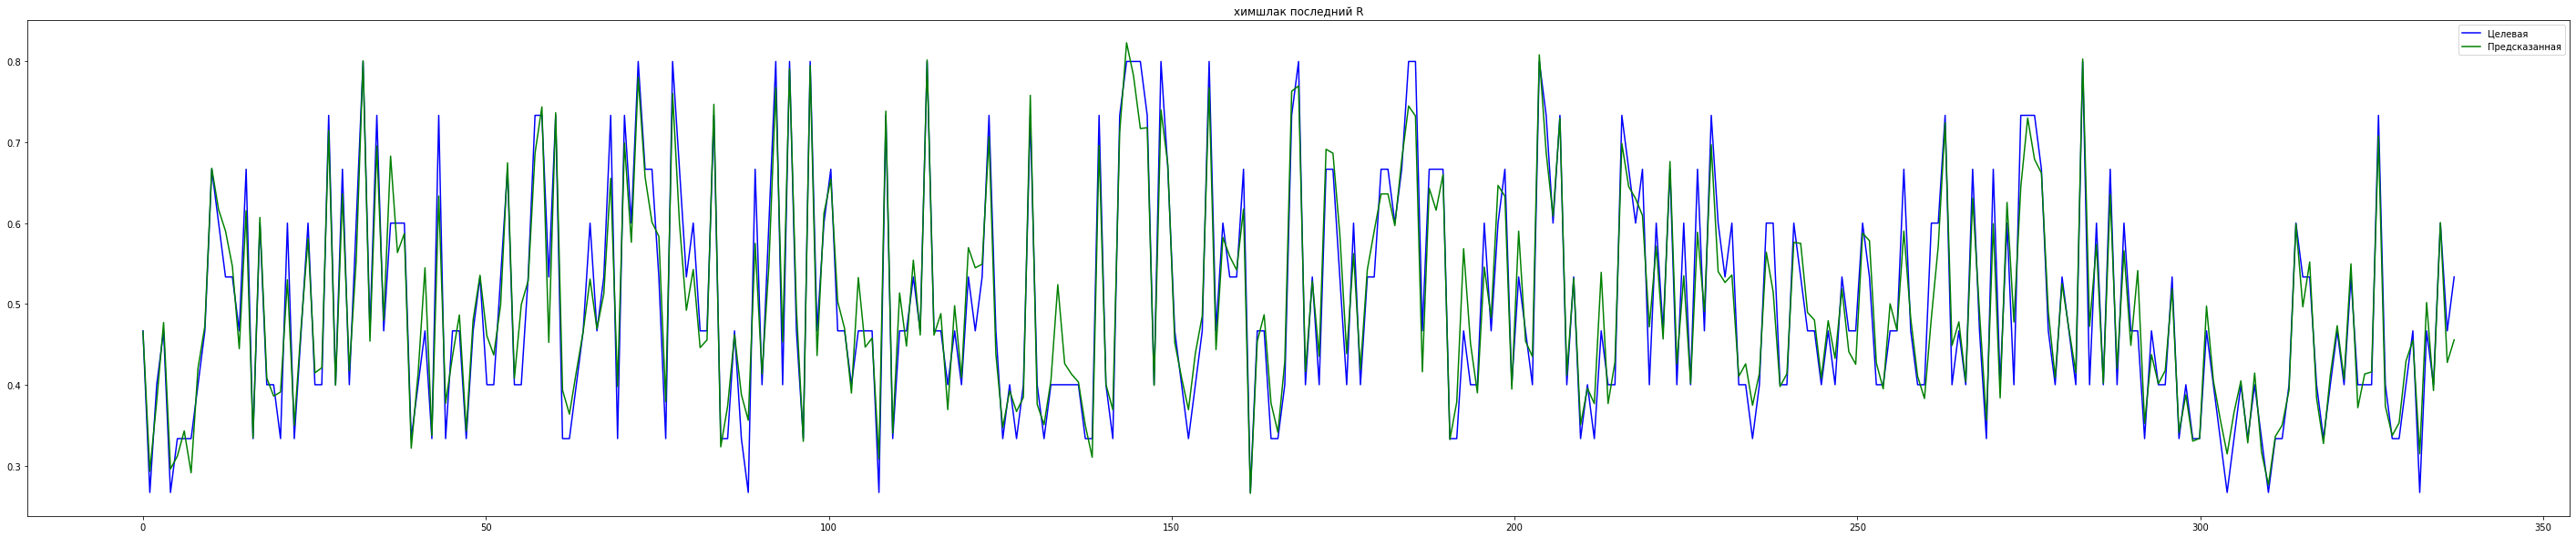

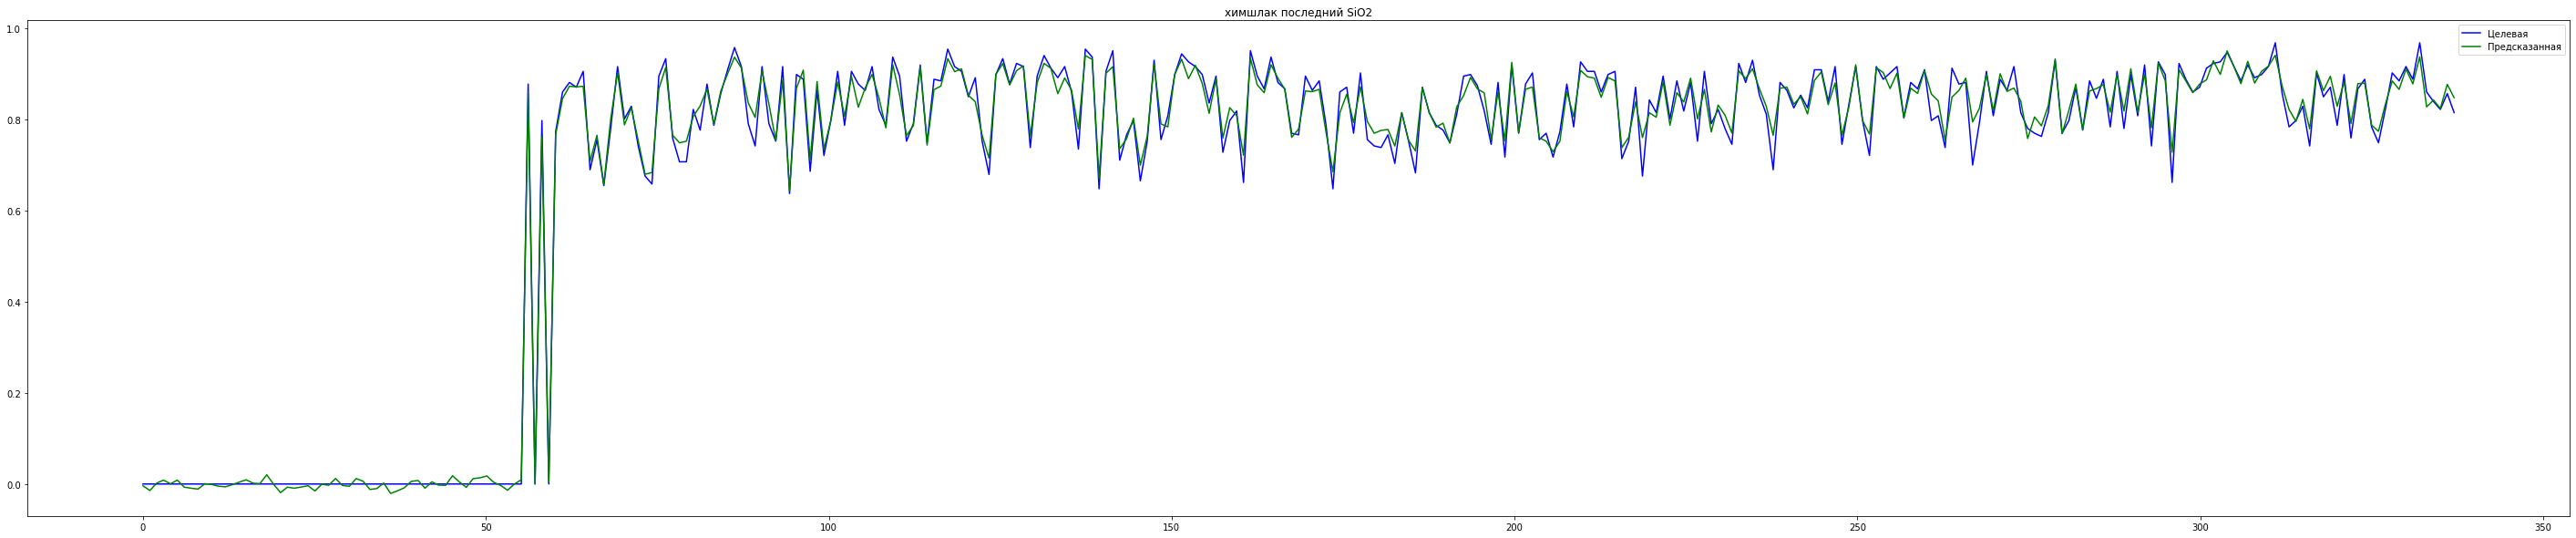

In [14]:
predict = best_model.predict(data_test_non_marked)
show_result(predict, target_test, 'source/result' )